# My Neural Network

In this project I want to build a neural network myself from scratch. I.e. not using keras or tensorflow or the like. I will only rely on basic packages like numpy. At the same time I want to practice my general software development skills so I am going to write my own python package: jacobnet. This contains classes for neurons, layers and networks and is unit tested. 

The package (/jacobnet) and tests (/tests) can be found in this repository. That's where all the heavy lifting goes on for this project.

My network can feedforward data and update the network weights. Here I demonstrate it's current functionality by training the neural network on the MNIST handwritten digit data set.

## Dependencies

I will import my custom package: jacobnet, as well as numpy, matplotlib and mnist. The mnist package is only used for easy loading of the MNIST handwritten digit data. 

In [1]:
import jacobnet as jn
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

# import the mnist data
mndata = MNIST('./mnist_data')
mndata.gz = True
images, labels = mndata.load_training()

As is good practice I will split the dataset into a train and test set.

In [2]:
X_train, y_train, X_test, y_test = jn.utils.train_test_split(images, labels, train_split=0.9)

print('There are', len(X_train), 'instances in the training set.')
print('There are', len(X_test), 'instances in the test set.')

There are 54000 instances in the training set.
There are 6000 instances in the test set.


## Building the network

The mnist images are 28x28 pixels which I will input as a flat array. There are 10 digit classes (0 $\rightarrow$ 9) so the output layer must be size 10. 

Using my jacobnet package I create a network instance with input size 784 (=28x28) a hidden layer of size 100 and output layer size 10. Before training I will evaluate the performance of the network.

In [3]:
net = jn.network.Network(input_size=784, layer_sizes = [100,10])

In [4]:
accuracy_pretraining = net.accuracy_score(X_test, y_test)

print('Before training the network accuracy is', accuracy_pretraining, '%')

Before training the network accuracy is 10.266666666666667 %


So the accuracy is about what we should expect - with random guessing you get 10% accuracy.

I will also plot the output arrays for a representative sample of inputs.

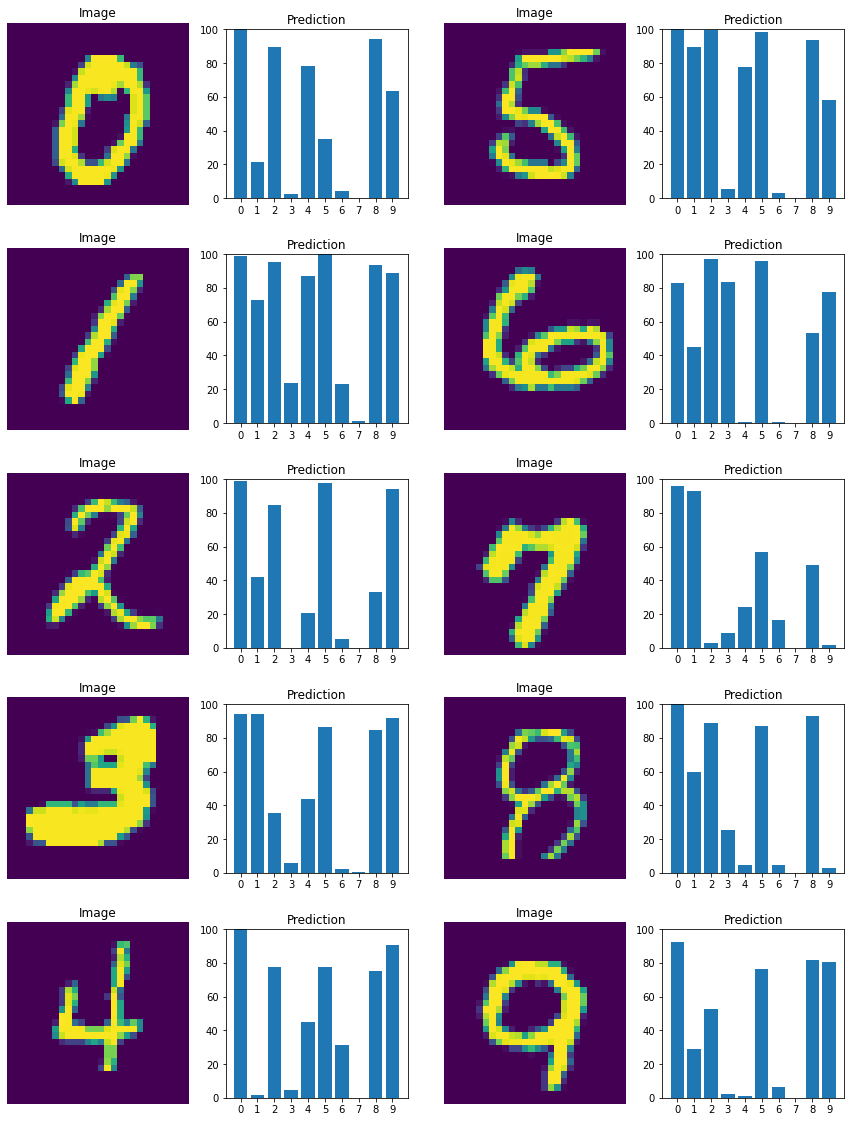

In [5]:
# This plots the output array for a given input for a random selection of each digit. 
# It provides a crude representation of the network performance.

fig, axs = plt.subplots(5,4)
fig.set_size_inches((15,20))

for target in range(10):
    # find all e.g. fours
    indices = np.where(np.array(labels) == target)[0]
    # random choose a four
    index = np.random.choice(indices)
    # reshape that image of a four and scale
    input_array = np.array(images[index]).reshape((784,1))/255.0
    # feedforward with network
    
    row = target%5
    column = 2*(target//5)
    
    output = net.forward(input_array)
    axs[row, 0 + column].imshow(input_array.reshape((28,28)))
    axs[row, 0 + column].axis('off')
    axs[row, 0 + column].set_title('Image')
    axs[row, 1 + column].bar(range(10), output.ravel()*100)
    axs[row, 1 + column].set_aspect(0.1)
    axs[row, 1 + column].set_xticks(range(10))
    axs[row, 1 + column].set_ylim([0,100])
    axs[row, 1 + column].set_title('Prediction')

So we can see that the network output is random and provides no information about the digits as we would expect. Hopefully this will change after training.

## Training

I will train the network using the Network class train method. This updates the network weights in mini-batches. I can set the learning rate, batch size and number epochs (the data set is shuffled between epochs). The method also records the accuracy on a holout validation set after each epoch so we can plot a learning curve after training. 

In [6]:
learning_rate = 0.1
batch_size = 32
epochs = 20
net.train(X_train, y_train, learning_rate=learning_rate, batch_size=batch_size, epochs=epochs, verbose=True)

Training epoch 1 / 20


C:\Users\Jacob\Dropbox\Side Projects\My Neural Network\jacobnet\utils.py:7: RuntimeWarning: overflow encountered in exp
  sig = 1/(1 + np.exp(-x))


Validation accuracy: 9.12962962962963 %
Training epoch 2 / 20
Validation accuracy: 26.574074074074073 %
Training epoch 3 / 20
Validation accuracy: 31.88888888888889 %
Training epoch 4 / 20
Validation accuracy: 39.09259259259259 %
Training epoch 5 / 20
Validation accuracy: 47.629629629629626 %
Training epoch 6 / 20
Validation accuracy: 52.2962962962963 %
Training epoch 7 / 20
Validation accuracy: 57.277777777777786 %
Training epoch 8 / 20
Validation accuracy: 61.111111111111114 %
Training epoch 9 / 20
Validation accuracy: 63.75925925925926 %
Training epoch 10 / 20
Validation accuracy: 65.44444444444444 %
Training epoch 11 / 20
Validation accuracy: 65.5 %
Training epoch 12 / 20
Validation accuracy: 65.48148148148148 %
Training epoch 13 / 20
Validation accuracy: 65.88888888888889 %
Training epoch 14 / 20
Validation accuracy: 66.57407407407408 %
Training epoch 15 / 20
Validation accuracy: 66.66666666666666 %
Training epoch 16 / 20
Validation accuracy: 67.33333333333333 %
Training epoch 17 

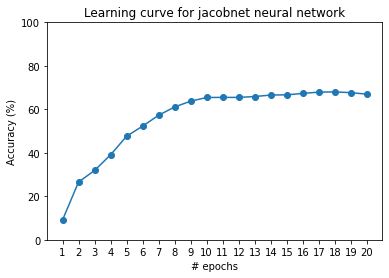

In [7]:
# plot learnining curve
plt.plot(range(1,epochs+1), net.history, 'o-')
plt.ylim([0,100])
plt.xticks(range(1,epochs+1))
plt.title('Learning curve for jacobnet neural network')
plt.xlabel('# epochs')
plt.ylabel('Accuracy (%)');

C:\Users\Jacob\Dropbox\Side Projects\My Neural Network\jacobnet\utils.py:7: RuntimeWarning: overflow encountered in exp
  sig = 1/(1 + np.exp(-x))


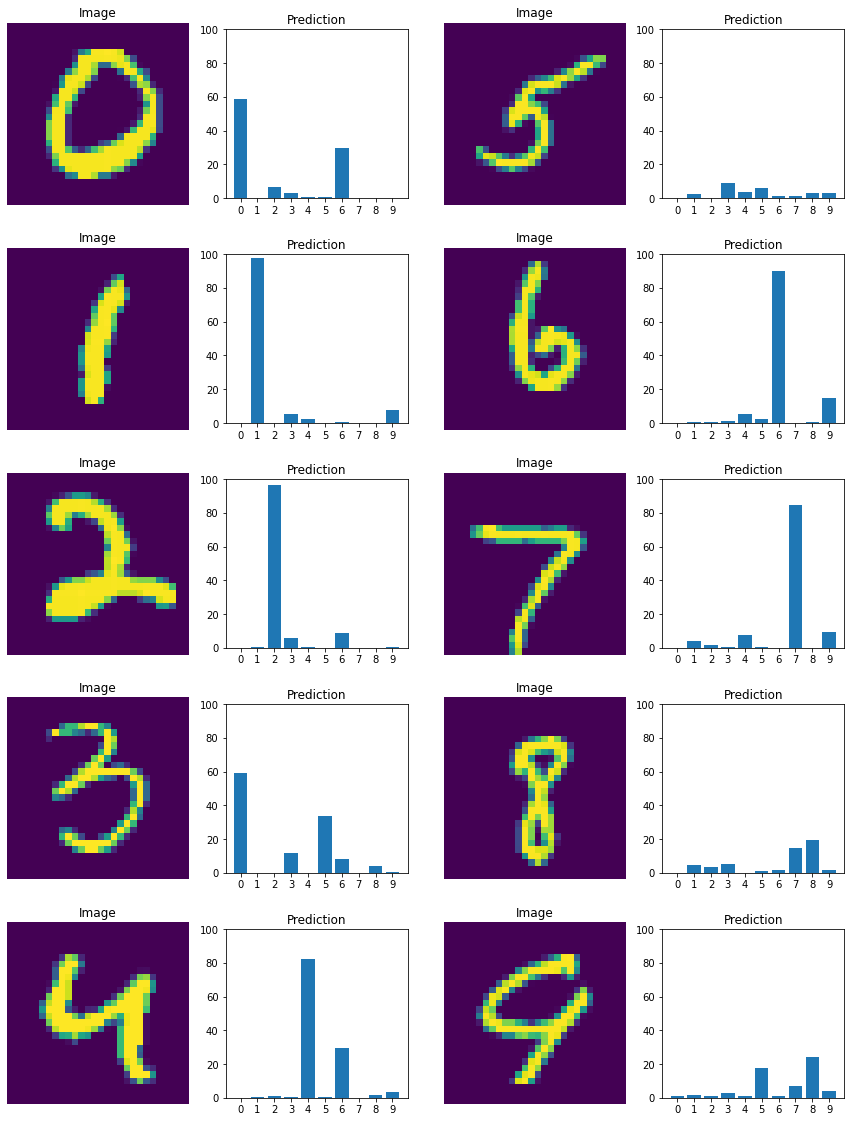

In [8]:
# This plots the output array for a given input for a random selection of each digit. 
# It provides a crude representation of the network performance.

fig, axs = plt.subplots(5,4)
fig.set_size_inches((15,20))

for target in range(10):
    # find all e.g. fours
    indices = np.where(np.array(labels) == target)[0]
    # random choose a four
    index = np.random.choice(indices)
    # reshape that image of a four and scale
    input_array = np.array(images[index]).reshape((784,1))/255.0
    # feedforward with network
    
    row = target%5
    column = 2*(target//5)
    
    output = net.forward(input_array)
    axs[row, 0 + column].imshow(input_array.reshape((28,28)))
    axs[row, 0 + column].axis('off')
    axs[row, 0 + column].set_title('Image')
    axs[row, 1 + column].bar(range(10), output.ravel()*100)
    axs[row, 1 + column].set_aspect(0.1)
    axs[row, 1 + column].set_xticks(range(10))
    axs[row, 1 + column].set_ylim([0,100])
    axs[row, 1 + column].set_title('Prediction')

So we see that the network can indeed learn to recognise handwitten digits! The network achieves ~ 65% accuracy which is significantly better thatn random guessing. 
It gets the answer correct more often than not.

To get a final measure of the network accuracy we use the test set:

In [10]:
accuracy_posttraining = net.accuracy_score(X_test, y_test)

print('After training the network accuracy is', accuracy_posttraining, '%')

After training the network accuracy is 69.19999999999999 %


Almost 70%!

## Conclusion

The network has a reasonable accuracy but there is a lot of room for improvement. After 20 epochs the learning curve is quite flat so more training data will most likely not help. With the current functionality of jacobnet improvements would have to be gained through hyperparameter tuning. e.g. adding more hidden layers or finding an optimal learning rate. 

Further improvents to the functionality of jacobnet could include:
1. Adding dropout to neurons during training to avoid overfitting.
2. Allowing different activation functions e.g. reLU
3. Adding the option for gradient normalisation (training currently uses gradient clipping).
4. Allowing different loss functions e.g. categorical cross entropy.

Please do check out the jacobnet package if you want to see how built this project.